## MNIST

### 1. Import Libraries

In [1]:
from keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import adam
from scipy.misc import toimage #(*)
import matplotlib.pylab as plt

Using TensorFlow backend.
/Users/hyunwoogu/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [43]:
import numpy as np
%matplotlib inline

### 2. Hyperparameters

In [3]:
batch_size = 100
epoch = 1
num_classes = 10

### 3. Load data

In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 38s 9us/step


### 4. Visualization

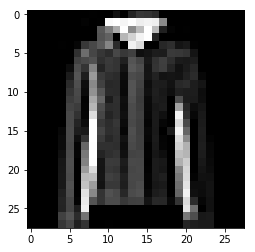

In [124]:
im = x_test[6]
plt.imshow(im, cmap=plt.get_cmap('gray'))
plt.show()

### 5. Reshape

In [63]:
print('shape')
print(x_train.shape)
print(y_train.shape)

shape
(60000, 28, 28)
(60000,)


In [82]:
x_train_RS = x_train.reshape(60000, 28, 28, 1)
x_test_RS  = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train_RS.shape)

(60000, 28, 28, 1)


In [83]:
x_train_RS = x_train_RS.astype('float32')
x_test_RS  = x_test_RS.astype('float32')

x_train_RS /= 255
x_test_RS  /= 255

In [85]:
y_train_RS = to_categorical(y_train, num_classes)
y_test_RS  = to_categorical(y_test, num_classes)

### 6. CNN layers

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total para

### 7. Train

In [87]:
model.fit(x_train_RS, y_train_RS, 
          batch_size=batch_size, epochs=epoch, verbose=1, 
          validation_data=(x_test_RS, y_test_RS))
loss, accuracy = model.evaluate(x_test_RS, y_test_RS, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 43s 722us/step - loss: 0.5238 - acc: 0.8122 - val_loss: 0.3922 - val_acc: 0.8592s: 0.5248 - acc: 


### 8. Save

In [89]:
accuracy

0.85919999999999996

In [90]:
model.save_weights("weight.hdf5")

In [92]:
im = im.reshape(1, 28, 28, 1)
im = im.astype('float32')
im /= 255
predict = model.predict(im)
print(predict)
print(np.argmax(predict, axis=1))

[[  2.45676368e-08   9.99999523e-01   3.55510676e-10   2.91214064e-07
    4.67685837e-08   1.75545178e-08   2.22053195e-10   4.84208340e-10
    8.74283970e-08   2.79614509e-11]]
[1]


### 9. Import libraries

In [95]:
from PIL import Image, ImageOps
import numpy as np
from tempfile import TemporaryFile
test_dataset = TemporaryFile()
import matplotlib.pyplot as plt

### 10. Gray

In [100]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return(gray)

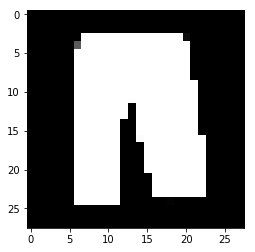

In [117]:
im = Image.open('trouser.jpeg')
im = im.resize((28,28))
im = np.asarray(ImageOps.invert(im))
im = rgb2gray(im)
plt.imshow(im, cmap=plt.get_cmap('gray'))
plt.show()

In [118]:
im = im.reshape(1, 28, 28, 1)
im = im.astype('float32')
im /= 255

### 11. Predict

In [119]:
predict = model.predict(im)
print(predict)
print(np.argmax(predict, axis=1))

[[  4.54461348e-04   9.93446052e-01   1.28099391e-05   1.64033670e-04
    7.03619735e-04   4.60013507e-06   4.30522207e-03   1.11591999e-06
    9.08027694e-04   1.22004487e-08]]
[1]
